In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.4.0'

In [4]:
keras.__version__

'2.4.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [7]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1983 - accuracy: 0.9291 - val_loss: 0.3022 - val_accuracy: 0.8926
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1958 - accuracy: 0.9307 - val_loss: 0.3101 - val_accuracy: 0.8878
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1926 - accuracy: 0.9311 - val_loss: 0.2932 - val_accuracy: 0.8944
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1876 - accuracy: 0.9332 - val_loss: 0.2884 - val_accuracy: 0.8984
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1857 - accuracy: 0.9345 - val_loss: 0.2956 - val_accuracy: 0.8966
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1831 - accuracy: 0.9348 - val_loss: 0.3018 - val_accuracy: 0.8922
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1801 - accuracy: 0.9364 - val_loss: 0.3106 - val_ac

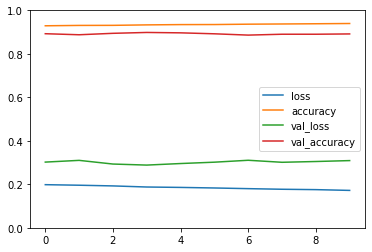

In [25]:
pd.DataFrame(history.history).plot()
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 72.3035 - accuracy: 0.8419


[72.30354309082031, 0.8418999910354614]

In [49]:
X_new = X_test[:36]
#y_proba = model.predict(X_new)
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

C:\Users\iniad\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sandal',
       'Dress', 'Coat', 'Trouser', 'Pullover', 'Coat', 'Bag',
       'T-shirt/top', 'Pullover', 'Sandal', 'Sneaker', 'Sandal',
       'Trouser', 'Coat', 'Shirt', 'T-shirt/top', 'Ankle boot', 'Coat',
       'Bag', 'Bag', 'Dress', 'Dress', 'Bag', 'T-shirt/top'], dtype='<U11')